# Logistic Regression__Yuhui Ren

### 1. Import Labraries

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### 2. Show Some Samples of the Raw Dataset

In [3]:
data = pd.read_csv('HR Analytics.csv')
data.head(3)          

,Age,Attrition,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,MonthlyRate,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,Sales,2,Life Sciences,2,Female,3,2,...,19479,Yes,11,1,0,8,6,4,0,5
1,49,0,279,Research & Development,1,Life Sciences,3,Male,2,2,...,24907,No,23,4,1,10,10,7,1,7
2,37,1,1373,Research & Development,2,Other,4,Male,2,1,...,2396,Yes,15,2,0,7,0,0,0,0


### 3. Data Preprocessing

### 3.1. Get Dummy Variables

Since there are some non-numeric features, such as *Department*, *EducationField* etc., let's change them into numeric ones by getting dummies.

In [4]:
dummies = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data = pd.get_dummies(data, columns = dummies, drop_first=True)   # change the non-numeric features to dummies
data.sample(3)    # show some randome samples of the dataset after geting dummies

,Age,Attrition,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
267,25,0,675,2,2,4,2,1,4000,18384,...,0,0,0,0,0,0,0,0,0,0
1185,43,0,1291,2,3,2,4,3,17603,3525,...,0,0,0,1,0,0,0,1,0,0
871,24,1,984,2,4,3,1,2,2210,3372,...,1,0,0,0,0,0,0,1,0,0


In [5]:
data.isnull().values.any()  # check if the dataset has NaN or not

False

In [6]:
data.describe() # inspect the data statistical info

,Age,Attrition,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,0.367863,403.509100,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above data description, we see that the data scale is imbalanced. <br>
For example, mean of *MonthlyRate* is 14313, while mean of *JobRole_Sales Representative* is only 0.05. <br>
So, let's sclae the whole dataset:

### 3.2 Scale the Dataset

Before scaling, let's split the whole dataset to train set and test set.

In [7]:
X = data.drop(['Attrition'], axis=1)      # split data to X (features) and y (target)
y = data[['Attrition']]
print(X.shape, y.shape)

(1470, 36) (1470, 1)


In [8]:
from sklearn.model_selection import train_test_split        # split data to train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)                 # fit the scaler with X_train set
X_train = scaler.transform(X_train) # transform X_train with the fitted scaler
X_test = scaler.transform(X_test)   # transform X_test with the fitted scaler

In [10]:
print(X_train[:3,:2])   # show scaled X_train, just first 3 rows & first 2 columns for demostration
print(X_test[:3,:2])    # show scaled X_test, just first 3 rows & first 2 columns for demostration

[[ 1.73508494 -1.41445903]
 [-2.05998289 -1.4344726 ]
 [-0.32509474  0.65444306]]
[[ 0.75921035 -1.58457432]
 [ 0.1086273   0.94213803]
 [ 0.97607137 -0.60140803]]


### 4. Modeling: Logistic Regression

### 4.1. Baseline Model

Let's use *GridSearch* to find out the best hyper-parametes' combination.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [12]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']  # 'liblinear' isn't included, because it doesn't support setting penalty='none'
penalty = ['l2', 'none']  # 'l1' and 'elasticnet' are not included, because 'newton-cg', 'lbfgs', 'sag' and 'saga' don't support 'l1' and 'elasticnet'
c_values = [0.01, 0.1, 1, 10, 100]

param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
gs_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
gs_result = gs_clf.fit(X_train, y_train)

Show results from different combinations:

In [13]:
means = gs_clf.cv_results_['mean_test_score']
stds = gs_clf.cv_results_['std_test_score']
params = gs_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.856635 (0.007150) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856635 (0.007150) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856635 (0.007150) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.856635 (0.007150) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.852086 (0.008441) with: {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
0.851181 (0.007791) with: {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.852090 (0.006733) with: {'C': 0.01, 'penalty': 'none', 'solver': 'sag'}
0.852090 (0.006733) with: {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
0.864796 (0.004279) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.864796 (0.004279) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.864796 (0.004279) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.864796 (0.004279) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.852086 (0.008441) with: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.851181 (0.007791) with: 

Show the best hyper-parameters' combination:

In [14]:
print("Best Score: %f \nBest Combination: %s" % (gs_clf.best_score_, gs_clf.best_params_))

Best Score: 0.864796 
Best Combination: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Now, use the refitted *gs_clf* (with best hyper-parameters' combination) to make prediction on testing set:

In [15]:
y_hat = gs_clf.predict(X_test)  # predict on testing set

Now, let's see the results:

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))
result1 = classification_report(y_test, y_hat, output_dict=True)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       300
           1       0.77      0.29      0.43        68

    accuracy                           0.85       368
   macro avg       0.81      0.64      0.67       368
weighted avg       0.84      0.85      0.83       368



We see the model makes pretty good results on classifying **group 0**, which means the employees do not leave companies **(Attrition=0)**. <br>
However, the model makes pretty poor prediction on classifying **group 1**, which means the employees leave companies **(Attrition=1)**. <br>
The reason behind this phenomenon could be that the dataset is imbalanced with more samples in **group 0** but much less samples on **group 1**.<br>
So, let's try to use **over sampling** for the dataset with **SMOTE** technique, to make both groups balanced.

### 4.2 Model with SMOTE

Let's check the number of samples for each group firstly:

In [17]:
total = len(y)
g1_num = y['Attrition'].sum()
g0_num = total - g1_num

print('Total number of employees: {}'.format(len(y)))
print('{} employees leave companies ({}%). '.format(g1_num, (g1_num/total*100).round(2)))
print('{} employees not ({}%).'.format(g0_num, (g0_num/total*100).round(2)))

Total number of employees: 1470
237 employees leave companies (16.12%). 
1233 employees not (83.88%).


The dataset is indeed imbalance, with only 16.12% and 83.88% samples in the two groups.<br>
Over-sampling is needed:

In [19]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X, y)

Check the shape of data before and after SMOTE:

In [19]:
print(X.shape, y.shape)
print(X_SMOTE.shape, y_SMOTE.shape)

(1470, 36) (1470, 1)
(2466, 36) (2466, 1)


Check number of employees who leave companies and who not:

In [20]:
total = len(y_SMOTE)
g1_num = y_SMOTE['Attrition'].sum()
g0_num = total - g1_num

print('Total number of employees: {}'.format(len(y_SMOTE)))
print('{} employees leave companies ({}%). '.format(g1_num, (g1_num/total*100).round(2)))
print('{} employees not ({}%).'.format(g0_num, (g0_num/total*100).round(2)))

Total number of employees: 2466
1233 employees leave companies (50.0%). 
1233 employees not (50.0%).


Now, let's use Logistic Regression to make prediction on data after SMOTE.<br>
Since the dataset is modified, we use GridSearch to find best hyper-parameters' combination again:

In [23]:
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_SMOTE, y_SMOTE, test_size=0.25)

In [24]:
clf2 = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']  # 'liblinear' isn't included, because it doesn't support setting penalty='none'
penalty = ['l2', 'none']  # 'l1' and 'elasticnet' are not included, because 'newton-cg', 'lbfgs', 'sag' and 'saga' don't support 'l1' and 'elasticnet'
c_values = [0.01, 0.1, 1, 10, 100]

param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
gs_clf2 = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_result2 = gs_clf2.fit(X_train_SMOTE, y_train_SMOTE)

print("Best Score: %f \nBest Combination: %s" % (gs_clf2.best_score_, gs_clf2.best_params_))

Best Score: 0.894010 
Best Combination: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


Make predictions on test set (after **SMOTE**) using best hyper-parameters' combination:

In [25]:
y_hat_SMOTE = gs_clf2.predict(X_test_SMOTE)  # predict on testing set

Check the prediction results:

In [56]:
print(classification_report(y_test_SMOTE, y_hat_SMOTE))
result2 = classification_report(y_test_SMOTE, y_hat_SMOTE, output_dict=True)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       303
           1       0.92      0.87      0.90       314

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617



Prediction results for group1 dramatically imcreased! <br>
However, prediction results for group0 slightly decreased.

Since the dataset has too many (36) features , let's try to select significant features and predict again, to see whether the performance may improve or not.

### 4.3. Model with Feature Selection

In [29]:
from sklearn.feature_selection import RFE

In [30]:
model_fs = LogisticRegression(C=10, penalty='l2', solver='newton-cg')   # use the combination got from SMOTE section
rfe = RFE(model_fs, n_features_to_select=None) # keep half of the features
rfe = rfe.fit(X_SMOTE, y_SMOTE)

In [33]:
print('Selected features: \n%s' % list(X_SMOTE.columns[rfe.support_]))
Selected_features = list(X.columns[rfe.support_])

Selected features: 
['JobInvolvement', 'StockOptionLevel', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']


Now, only the selected significant half of the features are used:

In [34]:
X_SMOTE_sf = X_SMOTE[Selected_features]

In [37]:
X_SMOTE_sf_train, X_SMOTE_sf_test, y_SMOTE_sf_train, y_SMOTE_sf_test = train_test_split(X_SMOTE_sf, y_SMOTE, test_size=0.25)

Since the dataset is again modified, with only half of the features left, let's find out best hyper-parameters' combination with the latest dataset:

In [39]:
clf3 = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']  # 'liblinear' isn't included, because it doesn't support setting penalty='none'
penalty = ['l2', 'none']  # 'l1' and 'elasticnet' are not included, because 'newton-cg', 'lbfgs', 'sag' and 'saga' don't support 'l1' and 'elasticnet'
c_values = [0.01, 0.1, 1, 10, 100]

param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
gs_clf3 = GridSearchCV(estimator=clf3, param_grid=param_grid, cv=5, scoring='accuracy')
grid_result3 = gs_clf3.fit(X_SMOTE_sf_train, y_SMOTE_sf_train)

print("Best Score: %f \nBest Combination: %s" % (gs_clf3.best_score_, gs_clf3.best_params_))

Best Score: 0.872909 
Best Combination: {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}


Make predictions on test set (after **feature selection**) using best hyper-parameters' combination:

In [41]:
y_hat_SMOTE_sf = gs_clf3.predict(X_SMOTE_sf_test)  # predict on testing set

Check the prediction results:

In [55]:
print(classification_report(y_SMOTE_sf_test, y_hat_SMOTE_sf))
result3 = classification_report(y_SMOTE_sf_test, y_hat_SMOTE_sf, output_dict=True)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       318
           1       0.97      0.83      0.89       299

    accuracy                           0.90       617
   macro avg       0.91      0.90      0.90       617
weighted avg       0.91      0.90      0.90       617



In [46]:
res = classification_report(y_SMOTE_sf_test, y_hat_SMOTE_sf)
res

str

### Summery

In the end, lets' check the models' performance along the whole story:

In [70]:
precision_g0_list = [result1['0']['precision'], result2['0']['precision'], result3['0']['precision']]
precision_g1_list = [result1['1']['precision'], result2['1']['precision'], result3['1']['precision']]

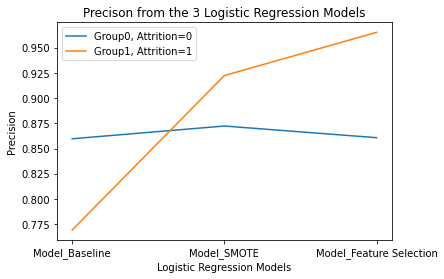

In [81]:
from matplotlib import pyplot as plt

plt.plot(precision_g0_list, label='Group0, Attrition=0')
plt.plot(precision_g1_list, label='Group1, Attrition=1')

plt.title('Precison from the 3 Logistic Regression Models')
plt.ylabel('Precision')
plt.xlabel('Logistic Regression Models')
plt.xticks([0,1,2], ['Model_Baseline', 'Model_SMOTE','Model_Feature Selection'])
plt.legend()
plt.show()

The precisions for Group0 has a bit fluctuation, but mainly remains the same.<br>
The precisions for Group1 always keep increasing with the modifications for the 3 models, from the 1st baseline model, to the 2nd model with SMOTE, to 3rd model with feature selection.